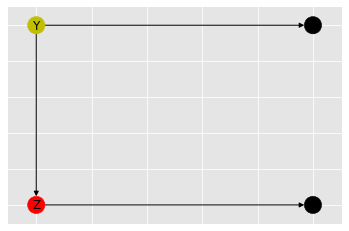

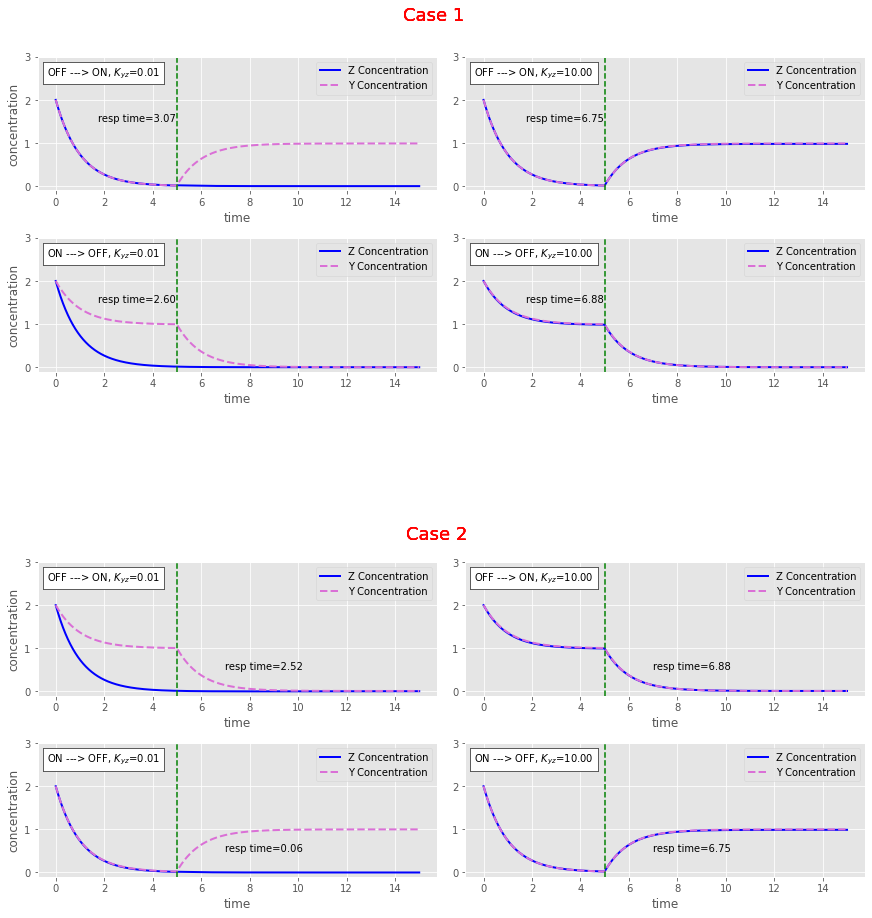

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('ggplot')

# directed graph
G = nx.DiGraph()
G.add_edges_from([('Y', 'Z'), ('Y', 'e1'), ('Z', 'e2')])
G.add_edge('Y','e1', length = -20)
n_colors = ['y','r','black','black']
pos={'Z': (1, 1), 'Y': (1, 2), 'e1':(2,2), 'e2':(2,1)}

nx.draw_networkx_nodes(G, pos, 
                       node_color=n_colors, node_size = 300)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True)
plt.show()



def ODE(By, Bz, ay, az, by, bz, Kxz, Kxy, Kyz
          ,h, X, Y1, Z1, Y2, Z2):
    
    qxy = (X/Kxy)**h/(1+(X/Kxy)**h)
    qxz = (X/Kxz)**h/(1+(X/Kxz)**h)
    gxy = 1/(1+(X/Kxy)**h)
    gxz = 1/(1+(X/Kxz)**h)
    
    dY1 = By + by*qxy - ay*Y1
    dZ1 = Bz + bz*qxz/(1+(Y1/Kyz)**h) - az*Z1
    
    dY2 = By + by*gxy - ay*Y2
    dZ2 = Bz + bz*gxz/(1+(Y2/Kyz)**h) - az*Z2
    
    return [dY1, dZ1, dY2, dZ2]

# integration 
def Euler(dt, t1, n_steps, By, Bz, ay, az, by, bz, Kxz, Kxy,
          Kyz, h, X, Y0, Z0):
    
    Y1, Z1 = np.zeros(n_steps), np.zeros(n_steps)
    Y2, Z2 = np.zeros(n_steps), np.zeros(n_steps)
    
    Y1[0], Z1[0] = Y0, Z0
    Y2[0], Z2[0] = Y0, Z0
    l1, l2 = [], []
    
    for i in range(1,t1):
        
        [dY1, dZ1, dY2, dZ2] = ODE(By, Bz, ay, az, by, bz, Kxz, Kxy, Kyz
              ,h, X, Y1[i-1], Z1[i-1], Y2[i-1], Z2[i-1])
        
        Y1[i] = Y1[i-1] + dY1*dt
        Z1[i] = Z1[i-1] + dZ1*dt 
        
        Y2[i] = Y2[i-1] + dY2*dt
        Z2[i] = Z2[i-1] + dZ2*dt 
        
          
    for i in range(t1,n_steps):
        
        [dY1, dZ1, dY2, dZ2] = ODE(By, Bz, ay, az, by, bz, Kxz, Kxy, Kyz
          ,h, 1-X, Y1[i-1], Z1[i-1], Y2[i-1], Z2[i-1])
        
        Y1[i] = Y1[i-1] + dY1*dt
        Z1[i] = Z1[i-1] + dZ1*dt
        
        Y2[i] = Y2[i-1] + dY2*dt
        Z2[i] = Z2[i-1] + dZ2*dt
        
        if i>t1 and np.abs(dZ1) <= 10**-3:
            l1.append ((i-t1)*dt)
            
        if  i>t1 and np.abs(dZ2) <= 10**-3:
            l2.append ((i-t1)*dt)
             
    return [Y1, Z1, Y2, Z2, min(l1), min(l2)]


def plots(dt, t1, n_steps, By, Bz, ay, az, by, bz, Kxz, Kxy, K
          ,h, Y0, Z0):
    
    fig = plt.figure(figsize=(12,12),constrained_layout=True)
    gs = fig.add_gridspec(5,2)
    ax = {}
    for j in [0,1]:
        for i in [0,1,3,4]:
            ax[i,j] = fig.add_subplot(gs[i, j])        
    
    for i,X in enumerate([0,1]):
        for j, Kyz in enumerate(K):

            [Y1, Z1, Y2, Z2, rt1, rt2] = Euler(dt, t1, n_steps, By, Bz, ay, az, by, bz, Kxz, Kxy,
              Kyz, h, X, Y0, Z0)
            t = np.linspace(0, n_steps*dt, n_steps)
            ax[i,j].plot(t, Z1, color='b', label='1',linewidth=2, alpha=1)
            ax[i,j].plot(t, Y1, color='orchid', label='2', linewidth=2, alpha=1, linestyle='--')
            ax[i,j].axvline(x=t1*dt, linestyle='--', color='g', label='3')
            ax[i,j].legend(['Z Concentration','Y Concentration'])
            at1 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            at2 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            ax[0,j].add_artist(at1)
            ax[1,j].add_artist(at2)
            ax[i,j].text(1.75,1.5, 'resp time=%1.2f'%rt1)
            ax[i,j].set_xlabel('time')
            ax[i,0].set_ylabel('concentration')
            ax[i,j].set_ylim([-0.1,3])
            
            
            ax[i+3,j].plot(t, Z2, color='b', label='1',linewidth=2, alpha=1)
            ax[i+3,j].plot(t, Y2, color='orchid', label='2', linewidth=2, alpha=1, linestyle='--')
            ax[i+3,j].axvline(x=t1*dt, linestyle='--', color='g', label='3')
            ax[i+3,j].legend(['Z Concentration','Y Concentration'])
            at3 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            at4 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            ax[3,j].add_artist(at3)
            ax[4,j].add_artist(at4)
            ax[i+3,j].text(7,0.5, 'resp time=%1.2f'%rt2)
            ax[i+3,j].set_xlabel('time')
            ax[i+3,0].set_ylabel('concentration')
            ax[i+3,j].set_ylim([-0.1,3])
            plt.figtext(0.5,1.05, "Case 1 ", ha="center", va="top", fontsize=18, color="r")
            plt.figtext(0.5,0.45, "Case 2", ha="center", va="top", fontsize=18, color="r")
            plt.savefig('1.png')

            
dt, t1, n_steps, By, Bz, ay = 0.005, 1000, 3000, 0, 0, 1
az, by, bz, Kxz, Kxy, h = 1, 1, 1, 0.1, 0.1, 2
Y0, Z0 = 2, 2
K = [0.01,10]

plots(dt, t1, n_steps, By, Bz, ay, az, by, bz, Kxz, Kxy, K,
          h, Y0, Z0)
    